In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import CategoricalDtype
import datetime
from time import strftime
from time import gmtime
from datetime import timedelta
from numpy import loadtxt
import dask.dataframe as dd
%matplotlib inline
import seaborn as sns
from pylab import *
import matplotlib

# Read from all quarters

In [12]:
dataframe = pd.read_csv('data.csv')

In [18]:

dataframe['starttime'] = pd.to_datetime(dataframe['starttime'],format='%m/%d/%Y %H:%M')
dataframe['stoptime'] = pd.to_datetime(dataframe['stoptime'],format='%m/%d/%Y %H:%M')

# Change string to datetime in dask dataframe

In [20]:
dataframe

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,...,131,Lincoln Ave & Belmont Ave,41.939365,-87.668385,15,303,Broadway & Cornelia Ave,41.945512,-87.645980,15
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,...,282,Halsted St & Maxwell St,41.864580,-87.646930,15,22,May St & Taylor St,41.869482,-87.655486,15
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,...,327,Sheffield Ave & Webster Ave,41.921687,-87.653714,19,225,Halsted St & Dickens Ave,41.919936,-87.648830,15
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,...,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19,194,State St & Wacker Dr,41.887155,-87.627750,11
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,...,320,Loomis St & Lexington St,41.872187,-87.661501,15,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3345734,2014,8,35,4,8,Subscriber,Male,2014-08-29 08:13:00,2014-08-29 08:16:00,...,198,Halsted St & Madison St,41.881750,-87.647800,19,91,Clinton St & Washington Blvd,41.883380,-87.641170,31
1048571,3345733,2014,8,35,4,8,Subscriber,Female,2014-08-29 08:13:00,2014-08-29 08:38:00,...,343,Racine Ave & Wrightwood Ave,41.928887,-87.658971,15,173,Mies van der Rohe Way & Chicago Ave,41.896910,-87.621743,15
1048572,3345732,2014,8,35,4,8,Subscriber,Male,2014-08-29 08:13:00,2014-08-29 08:30:00,...,338,Calumet Ave & 18th St,41.857611,-87.619407,15,81,Daley Center Plaza,41.884451,-87.629892,47
1048573,3345730,2014,8,35,4,8,Subscriber,Female,2014-08-29 08:13:00,2014-08-29 08:22:00,...,251,Clarendon Ave & Leland Ave,41.967968,-87.650001,15,294,Broadway & Berwyn Ave,41.978353,-87.659753,15


In [22]:
starttime = dataframe['starttime']
endtime = dataframe['starttime']

# Trip by Month (using Start time )

[Text(0, 0.5, 'Number of Trips'), Text(0.5, 0, 'Local Start time')]

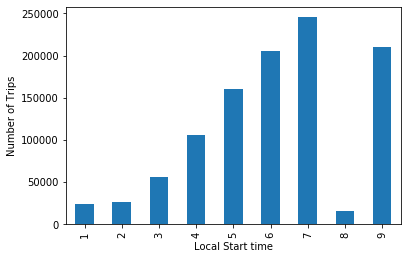

In [23]:
ax = starttime.groupby(starttime.dt.month).count().plot(kind="bar")
ax.set(xlabel = "Local Start time", ylabel = "Number of Trips")

# Trip by Weekday (using Start time )

[Text(0, 0.5, 'Number of Trips'), Text(0.5, 0, 'Local Start time')]

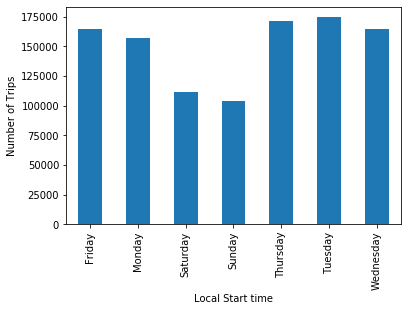

In [25]:
ax = starttime.groupby(starttime.dt.weekday_name).count().plot(kind="bar")
ax.set(xlabel = "Local Start time", ylabel = "Number of Trips")

# Trip by Hour (using Start time )

[Text(0, 0.5, 'Number of Trips'), Text(0.5, 0, 'Local Start time')]

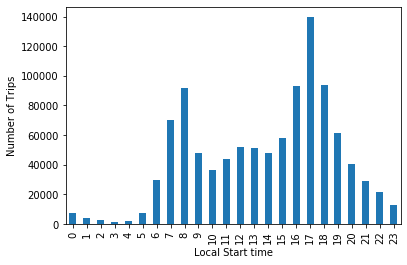

In [26]:
ax=starttime.groupby(starttime.dt.hour).count().plot(kind="bar")
ax.set(xlabel = "Local Start time", ylabel = "Number of Trips")

# Trip by month (using destination time )

[Text(0, 0.5, 'Number of Trips'), Text(0.5, 0, 'Local End time')]

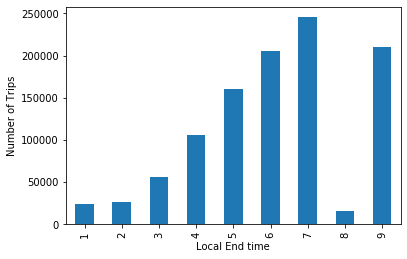

In [27]:
ax = endtime.groupby(endtime.dt.month).count().plot(kind="bar")
ax.set(xlabel = "Local End time", ylabel = "Number of Trips")

# Trip by month (using destination time )

[Text(0, 0.5, 'Number of Trips'), Text(0.5, 0, 'Local End time')]

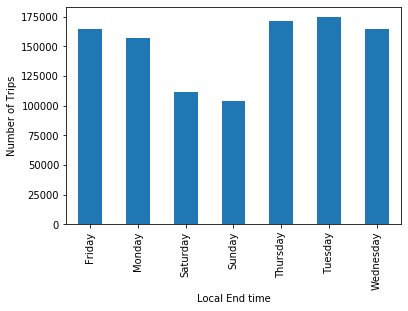

In [28]:
ax=endtime.groupby(endtime.dt.weekday_name).count().plot(kind="bar")
ax.set(xlabel = "Local End time", ylabel = "Number of Trips")

# Trip by Weekday (using destination time )

[Text(0, 0.5, 'Number of Trips'), Text(0.5, 0, 'Local End time')]

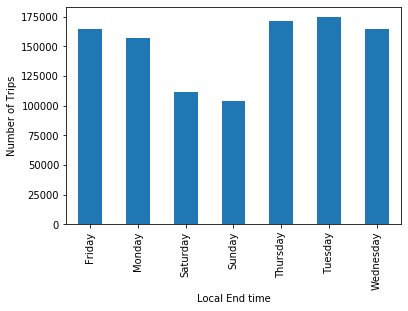

In [29]:
ax = endtime.groupby(endtime.dt.weekday_name).count().plot(kind="bar")
ax.set(xlabel = "Local End time", ylabel = "Number of Trips")

In [13]:
# Trip by Hour (using destination time )

[Text(0, 0.5, 'Number of Trips'), Text(0.5, 0, 'Local End time')]

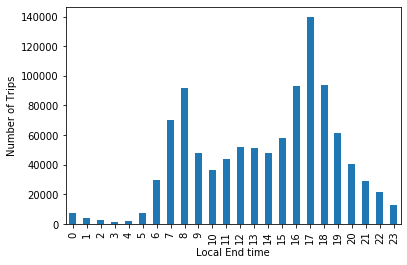

In [30]:
ax = endtime.groupby(endtime.dt.hour).count().plot(kind="bar")
ax.set(xlabel = "Local End time", ylabel = "Number of Trips")

(array([151199., 307319., 339494., 317213., 277424., 232484., 195079.,
        162440., 137600., 116374., 100631.,  88020.,  78730.,  68835.,
         60985.,  53061.,  44795.,  37439.,  31235.,  26296.,  22304.,
         19463.,  16957.,  14935.,  13131.,  11392.,  10111.,   9125.]),
 array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
        1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200,
        2300, 2400, 2500, 2600, 2700, 2800, 2900]),
 <a list of 28 Patch objects>)

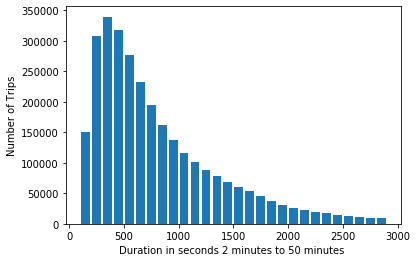

In [16]:

bins =[]
for x in range(100,3000,100):
    bins.append(x)
plt.xlabel("Duration in seconds 2 minutes to 50 minutes ")
plt.ylabel("Number of Trips")
plt.hist(duration,bins=bins,rwidth=0.8)

[Text(0, 0.5, 'Top Start stations'), Text(0.5, 0, 'Number of Trips')]

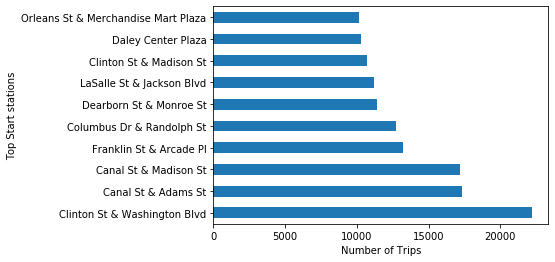

In [34]:
ax = dataframe['from_station_name'].value_counts().nlargest(10).plot(kind="barh")
ax.set(xlabel = "Number of Trips", ylabel = "Top Start stations")

[Text(0, 0.5, 'Top Destination stations'), Text(0.5, 0, 'Number of Trips')]

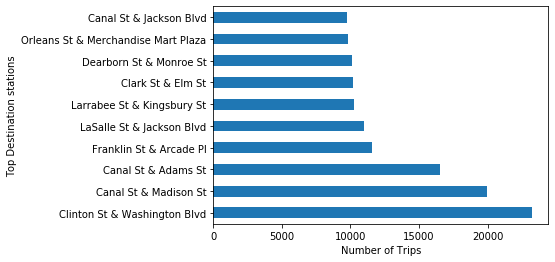

In [36]:
ax = dataframe['to_station_name'].value_counts().nlargest(10).plot(kind="barh")
ax.set(xlabel = "Number of Trips", ylabel = "Top Destination stations")

[Text(0, 0.5, 'Top Destination stations'), Text(0.5, 0, 'Number of Trips')]

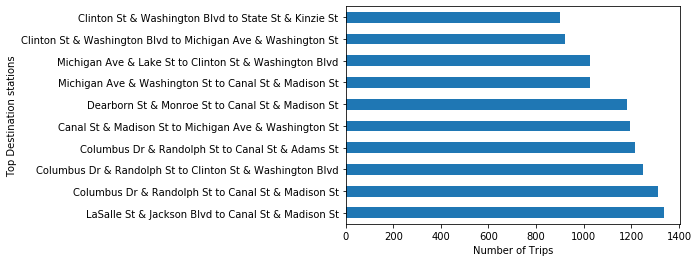

In [38]:
ax = (dataframe['from_station_name'] +" to "+ dataframe['to_station_name']).value_counts().nlargest(10).plot(kind="barh")
ax.set(xlabel = "Number of Trips", ylabel = "Top Destination stations")

# Trips by Usertype

In [20]:
#data.groupby(['Local Start Time','User Type']).count().plot(kind="bar")

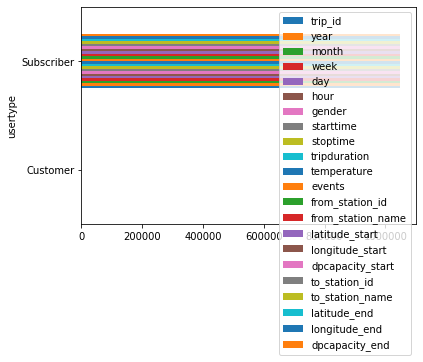

In [40]:
dataframe.groupby('usertype').count().plot(kind="barh")

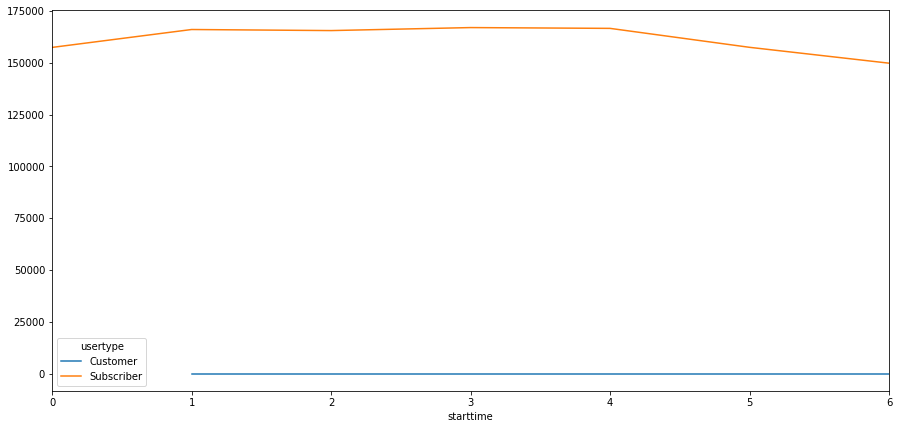

In [42]:
fig, ax = plt.subplots(figsize=(15,7))
dataframe.groupby([starttime.dt.weekday,'usertype']).count()['trip_id'].unstack().rolling(7, min_periods=1).mean().plot(ax=ax)


# Trips by User type 

[Text(0, 0.5, 'Number of Trips'), Text(0.5, 0, 'User Type')]

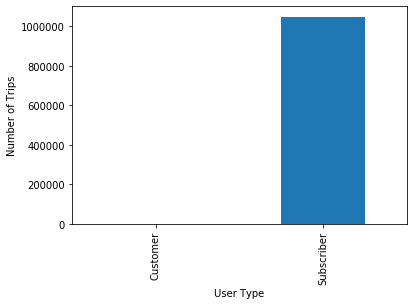

In [43]:
ax = dataframe.groupby('usertype').count()['trip_id'].plot(kind="bar")
ax.set(xlabel = "User Type", ylabel = "Number of Trips")

# Trip by usertype and gender

[Text(0, 0.5, 'Number of Trips'), Text(0.5, 0, 'User Type')]

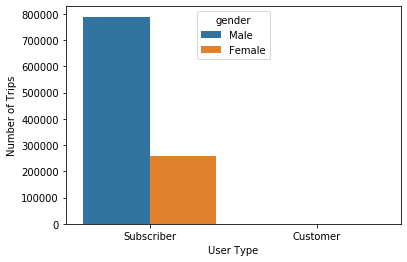

In [45]:
ax=sns.countplot(x='usertype', hue = 'gender', data = dataframe)
ax.set(xlabel = "User Type", ylabel = "Number of Trips")

In [48]:
dataframe['dayofweek']=dataframe['starttime'].dt.day_name()

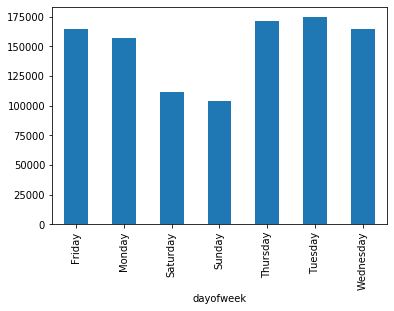

In [49]:
dataframe.groupby('dayofweek').count()['trip_id'].plot(kind="bar")

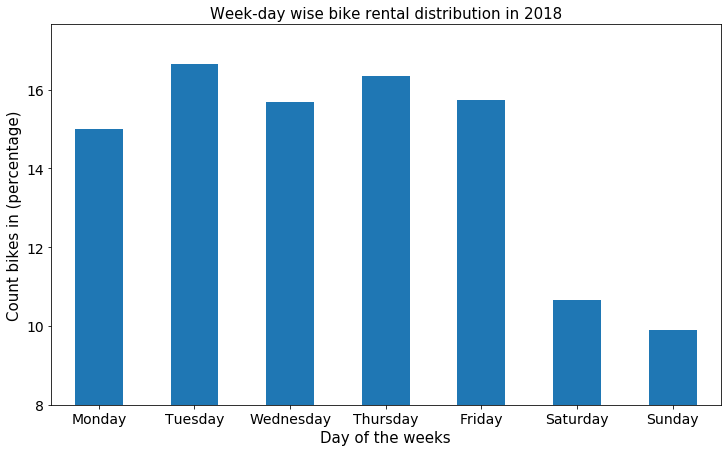

In [53]:
#Plotting the week day wise distribution
dataframe['dayofweek'] = pd.Categorical(dataframe['dayofweek'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

week1=(dataframe['dayofweek'].value_counts()*100)/len(dataframe)
week2 = week1.sort_index()


plt.figure(figsize=(12,7))
week2.plot(kind='bar')

plt.ylim(8,max(week2)+1)
plt.xticks(rotation=0,fontsize=14)
plt.yticks(fontsize=14)
plt.title("Week-day wise bike rental distribution in 2018",fontsize=15)
plt.xlabel("Day of the weeks",fontsize=15)
plt.ylabel("Count bikes in (percentage)",fontsize=15)

matplotlib.rcParams['axes.linewidth'] = 3.5

# Correlation matrix 

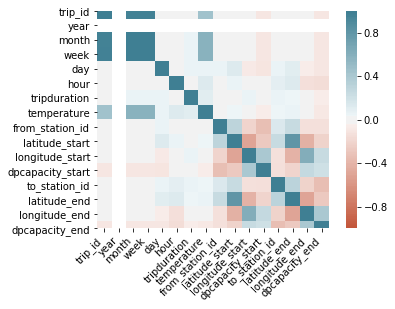

In [55]:
corr = dataframe.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

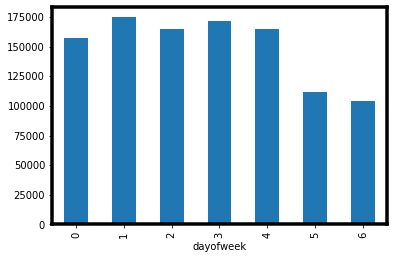

In [58]:
dataframe['dayofweek']=dataframe['starttime'].dt.weekday
dataframe.groupby('dayofweek').count()['trip_id'].plot(kind="bar")

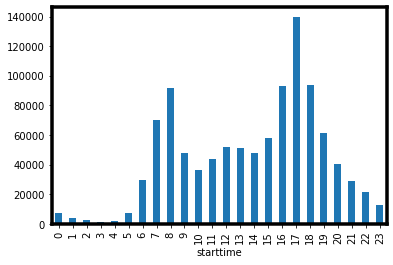

In [59]:
endtime.groupby(endtime.dt.hour).count().plot(kind="bar")


In [60]:
dataframe.groupby(['dayofweek',starttime.dt.hour]).size()

dayofweek  starttime
0          0             657
           1             315
           2             185
           3             149
           4             258
                        ... 
6          19           5988
           20           4047
           21           3130
           22           2299
           23           1176
Length: 168, dtype: int64

In [62]:
np.unique(dataframe['starttime'].dt.weekday_name)


array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

# Trip by hour for each weekday

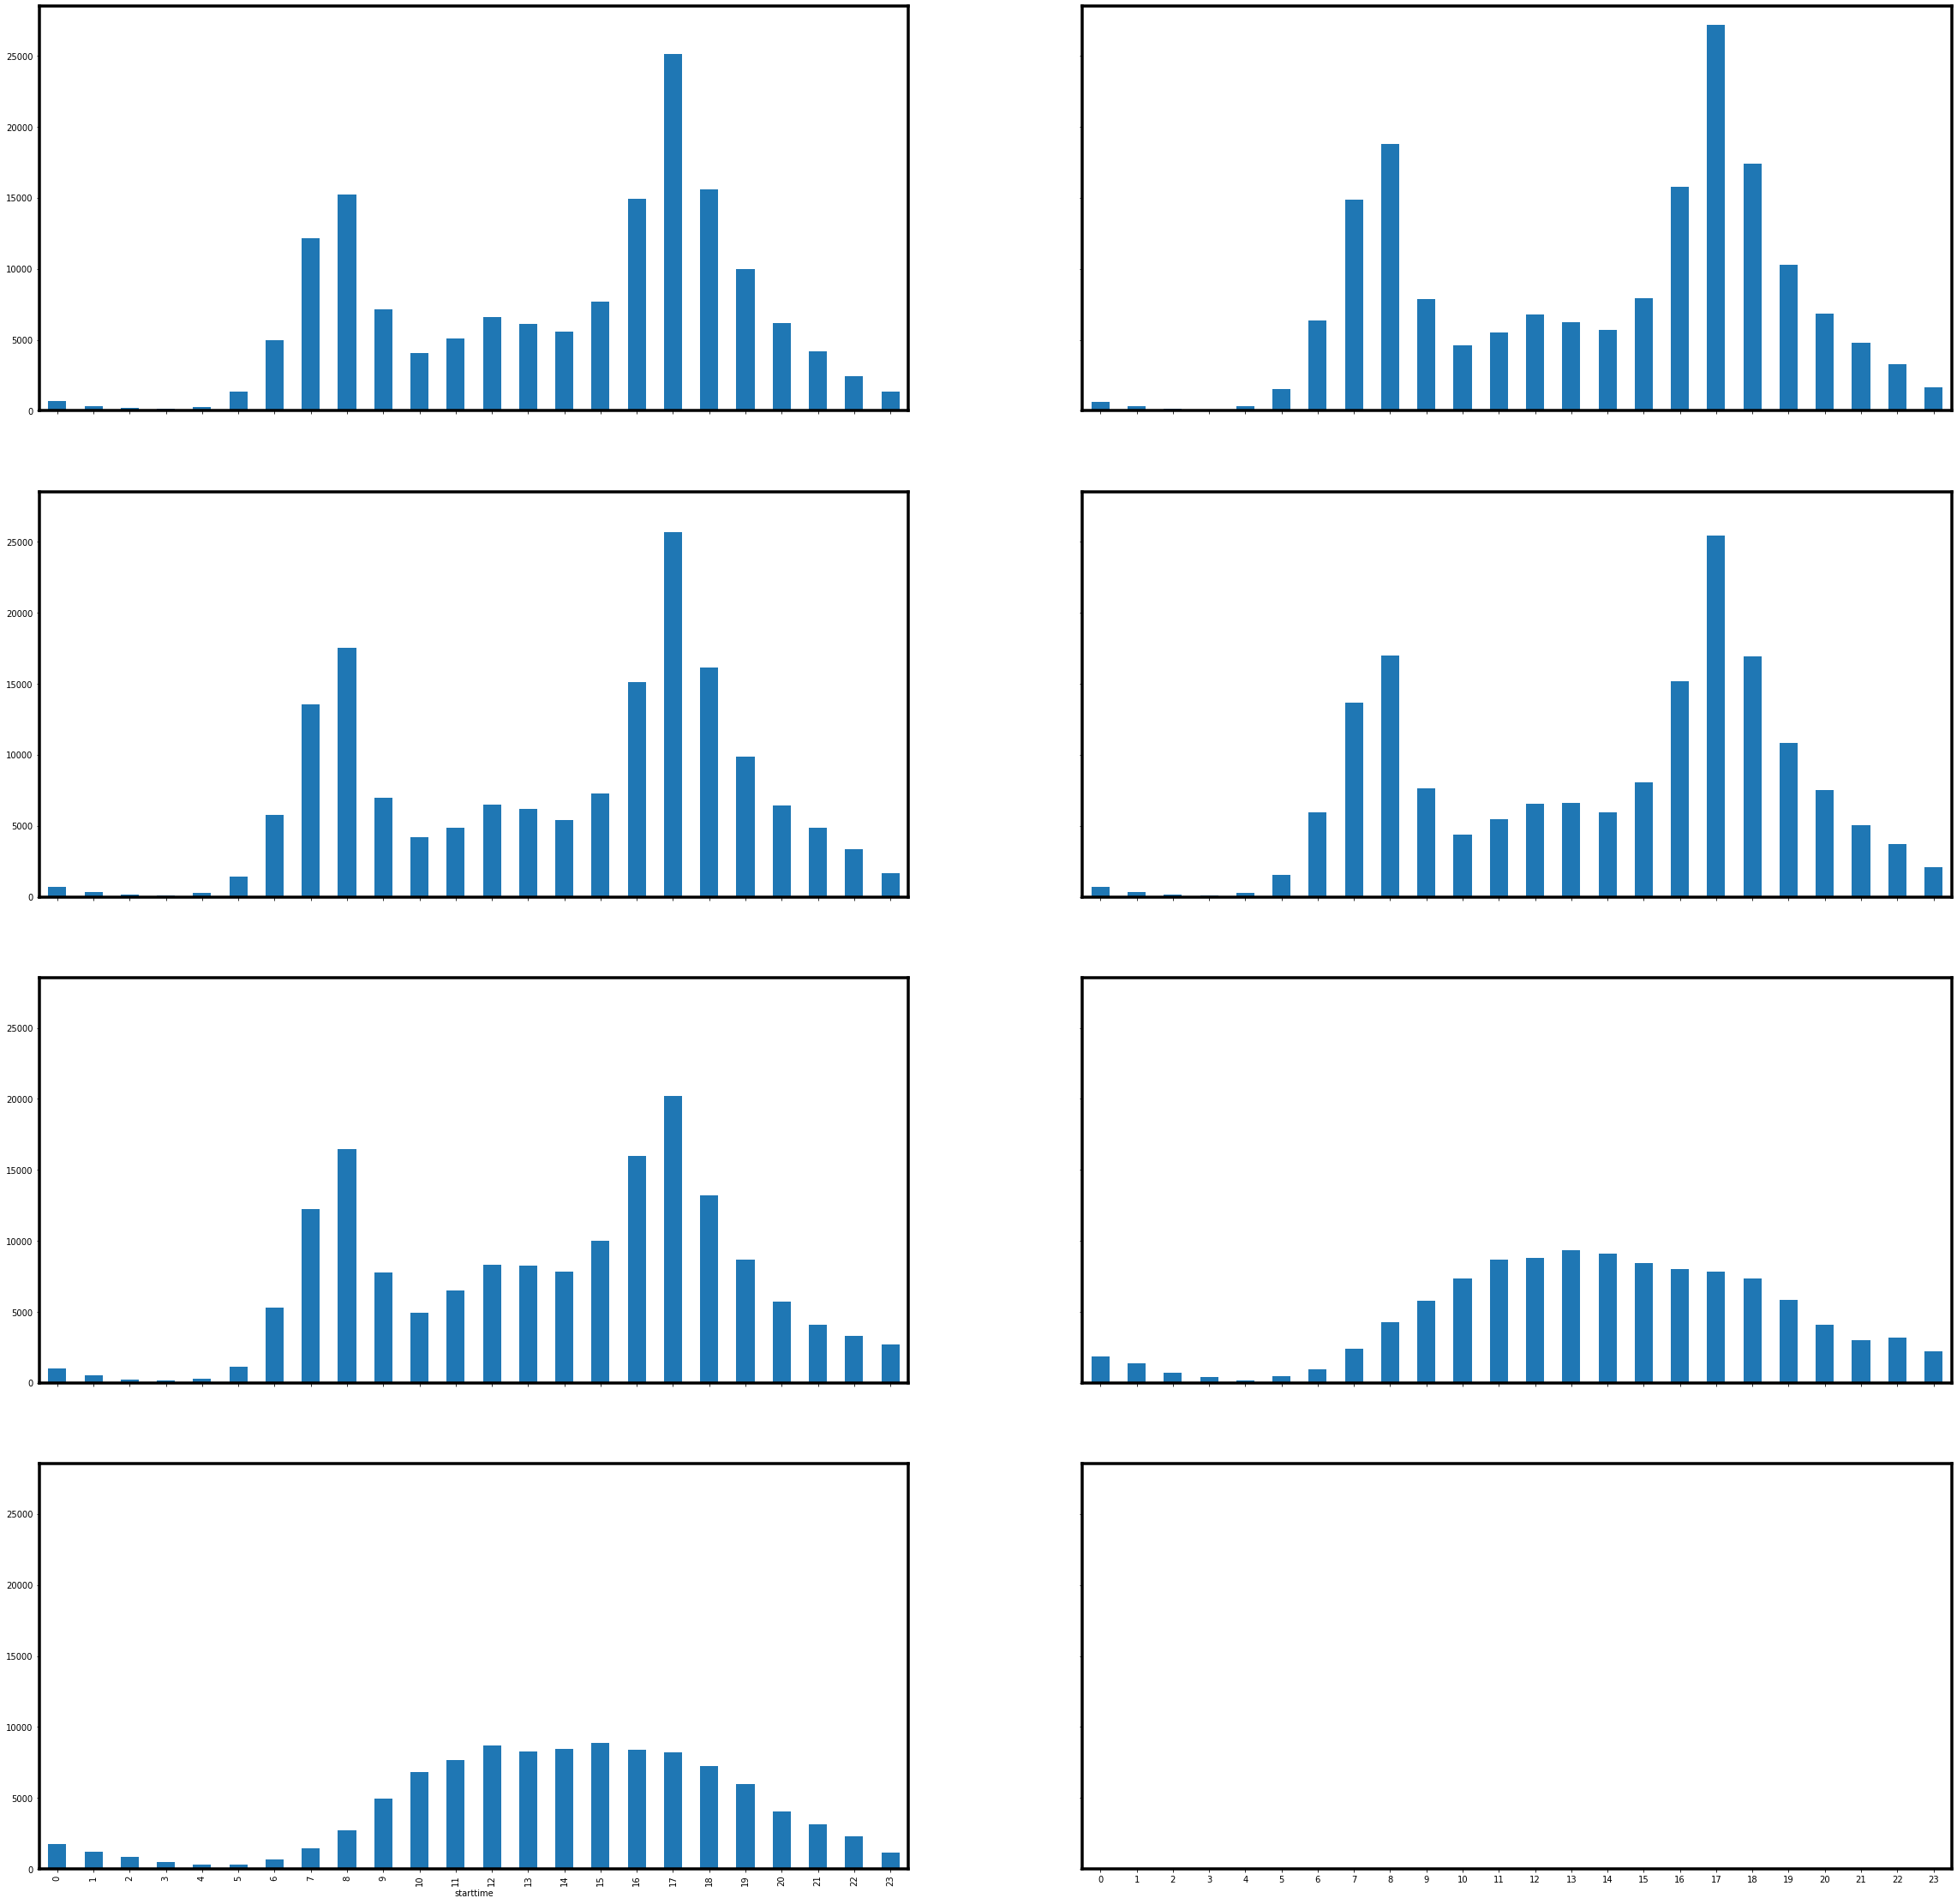

In [65]:
fig, ((ax1, ax2),(ax3,ax4),(ax5, ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True, figsize=(40,40))
array=[]
for day in np.unique(dataframe['dayofweek']):
    day_dataframe = dataframe.loc[dataframe['dayofweek']==day]
    start = day_dataframe['starttime']
    array.append(day_dataframe.groupby(start.dt.hour).count()['trip_id'])

array[0].plot(ax=ax1,kind="bar")
#ax1.xlabel("Hour")
array[1].plot(ax=ax2,kind="bar")
array[2].plot(ax=ax3,kind="bar")
array[3].plot(ax=ax4,kind="bar")
array[4].plot(ax=ax5,kind="bar")
array[5].plot(ax=ax6,kind="bar")
array[6].plot(ax=ax7,kind="bar")

In [68]:
dataframe['month'] = dataframe['starttime'].dt.month

In [70]:
dataframe['month']

0          6
1          6
2          6
3          6
4          6
          ..
1048570    8
1048571    8
1048572    8
1048573    8
1048574    8
Name: month, Length: 1048575, dtype: int64

1
2
3
4
5
6
7
8
9


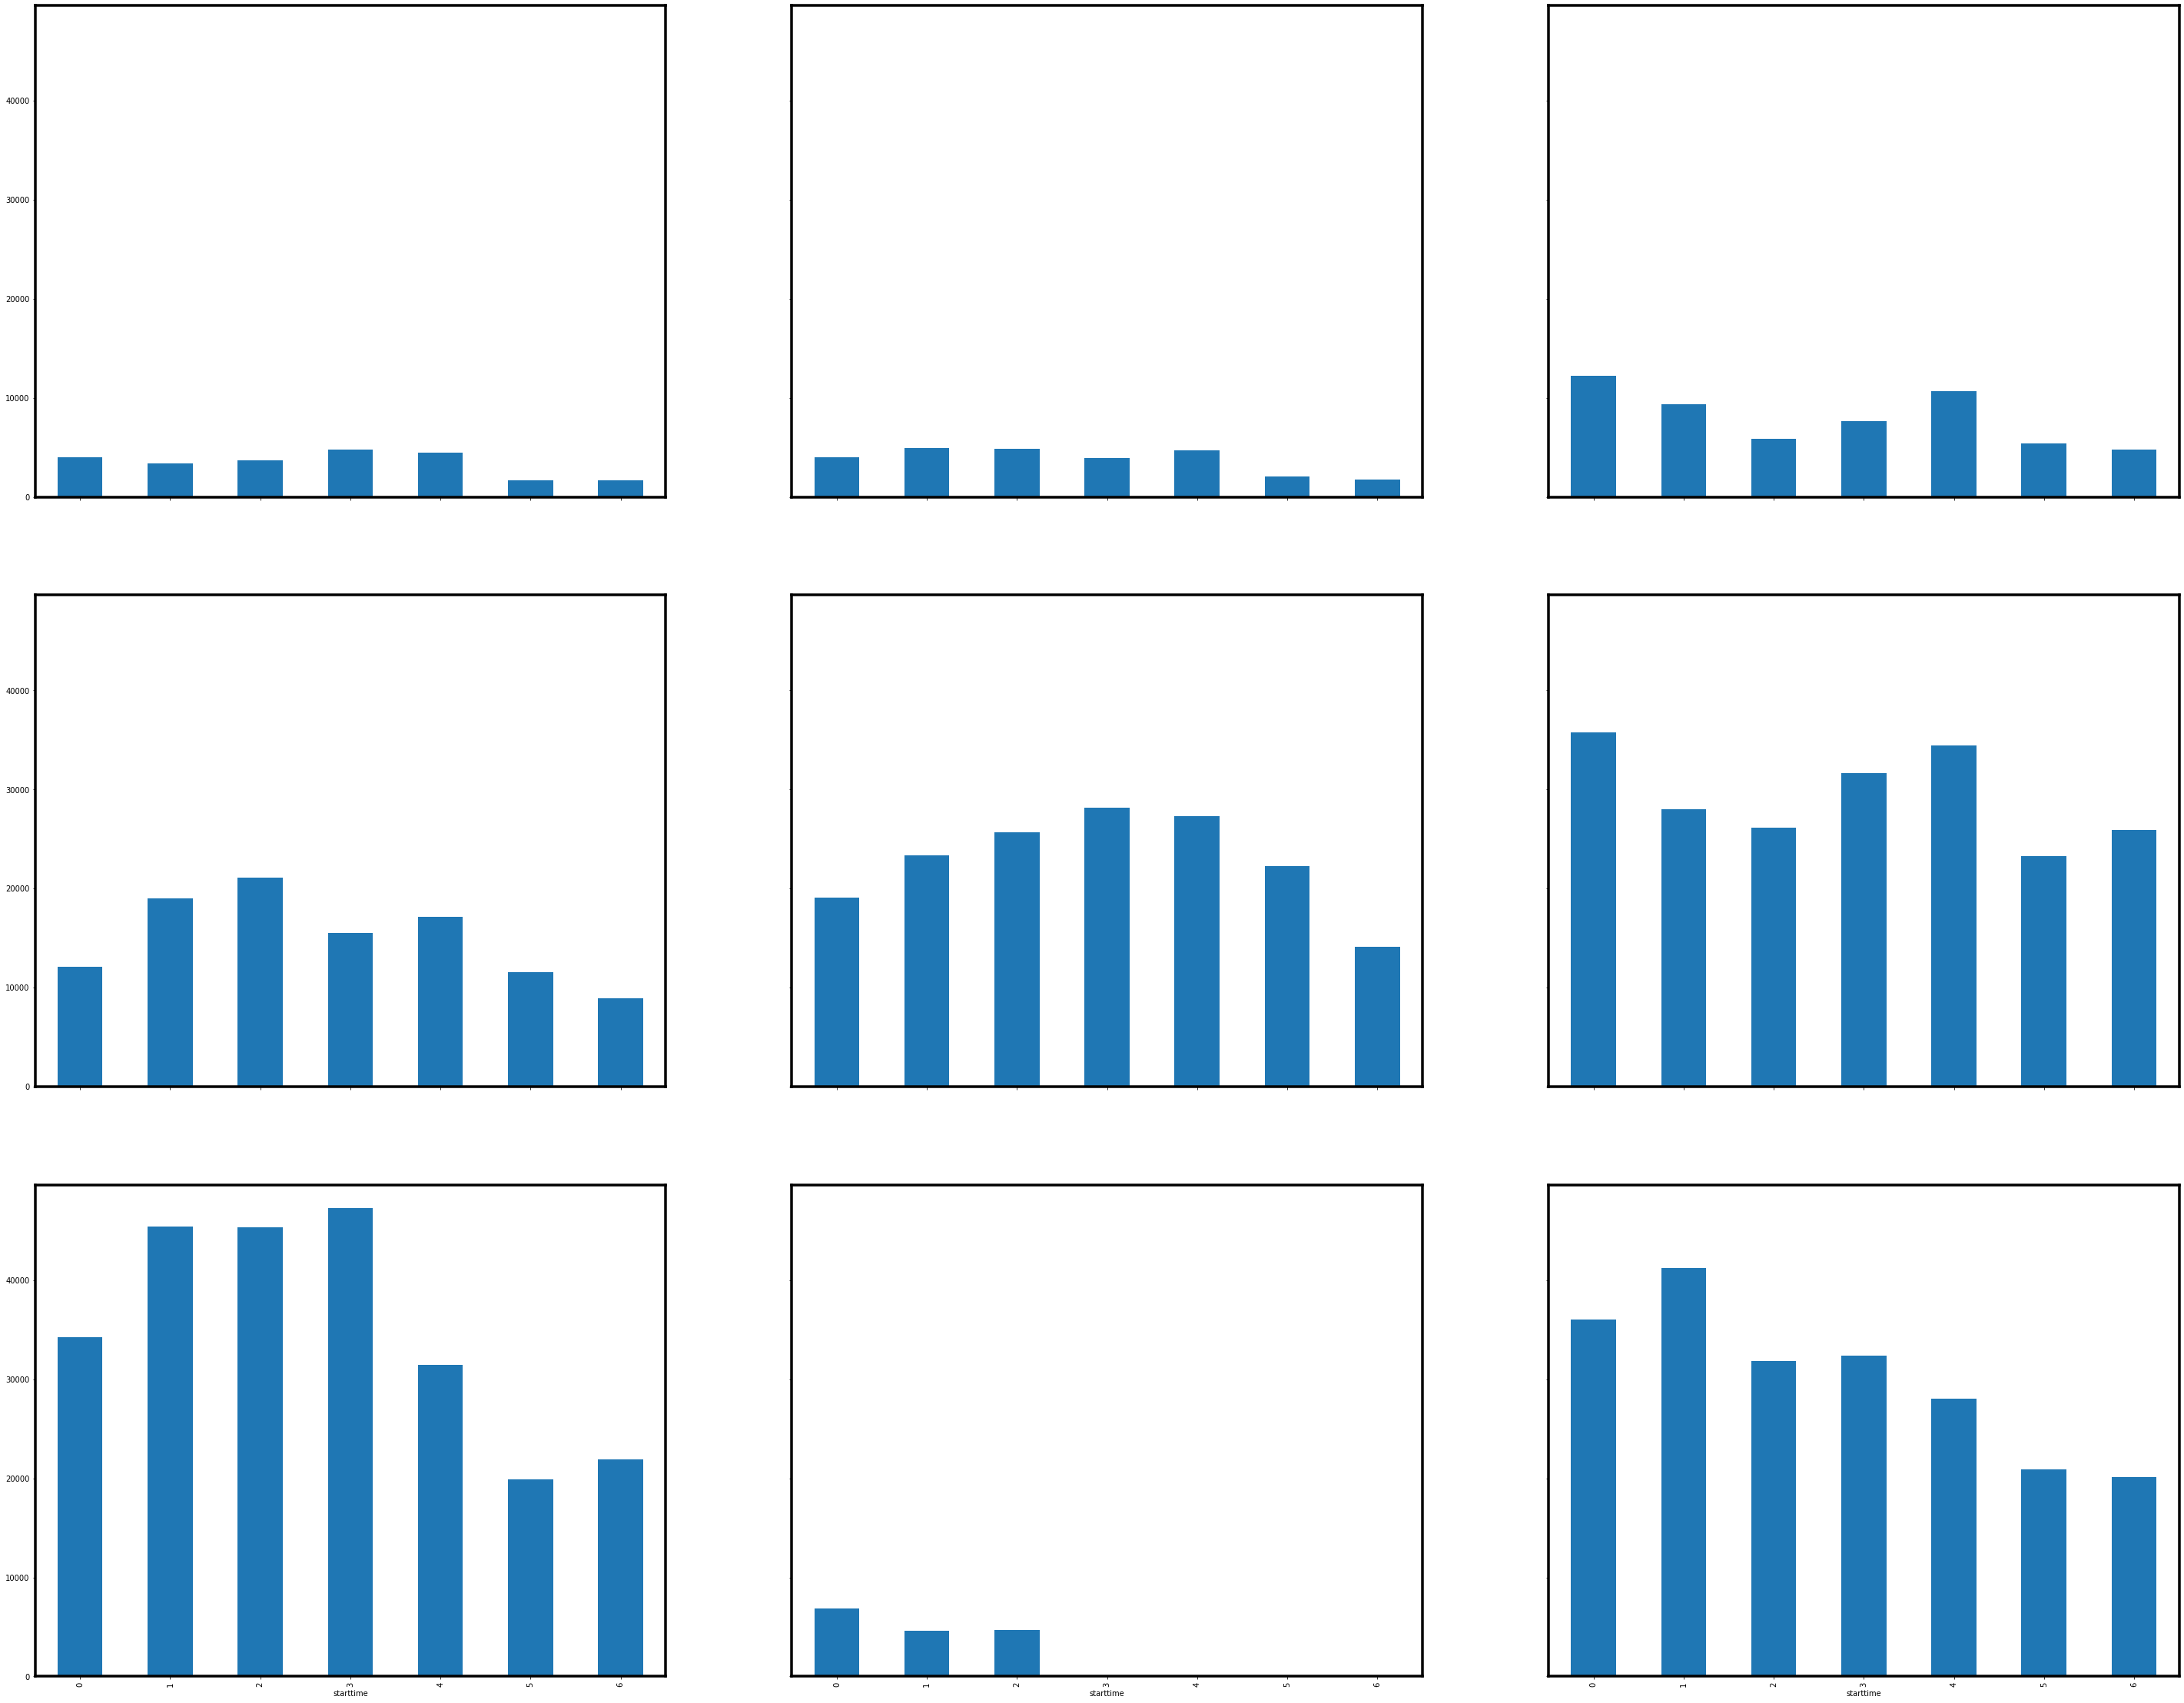

In [74]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(50,40))
aarray=[]
for mon in np.unique(dataframe['month']):
    print(mon)
    mon_dataframe = dataframe.loc[dataframe['month']==mon]
    start = mon_dataframe['starttime']
    aarray.append(mon_dataframe.groupby(start.dt.weekday).count()['trip_id'])

aarray[0].plot(ax=ax1,kind="bar")

aarray[1].plot(ax=ax2,kind="bar")
aarray[2].plot(ax=ax3,kind="bar")
aarray[3].plot(ax=ax4,kind="bar")
aarray[4].plot(ax=ax5,kind="bar")
aarray[5].plot(ax=ax6,kind="bar")
aarray[6].plot(ax=ax7,kind="bar")
aarray[7].plot(ax=ax8,kind="bar")
aarray[8].plot(ax=ax9,kind="bar")
#aarray[9].plot(ax=ax10,kind="bar")
#aarray[10].plot(ax=ax11,kind="bar")
#aarray[11].plot(ax=ax12,kind="bar")


In [36]:
aarray

[Local Start Time
 0    15646
 1    18727
 2    21739
 3    16965
 4    16931
 5    11614
 6     8084
 Name: Trip ID, dtype: int64, Local Start Time
 0    15539
 1    18997
 2    20147
 3    18645
 4    14581
 5     7886
 6     7155
 Name: Trip ID, dtype: int64, Local Start Time
 0    25147
 1    23030
 2    26525
 3    30036
 4    31953
 5    19829
 6    17969
 Name: Trip ID, dtype: int64, Local Start Time
 0    38504
 1    29251
 2    28727
 3    34887
 4    30568
 5    17015
 6    21160
 Name: Trip ID, dtype: int64, Local Start Time
 0    45712
 1    74955
 2    69455
 3    71870
 4    50650
 5    48603
 6    39904
 Name: Trip ID, dtype: int64, Local Start Time
 0    61978
 1    61001
 2    70750
 3    60615
 4    72332
 5    66004
 6    54634
 Name: Trip ID, dtype: int64, Local Start Time
 0    92098
 1    92340
 2    73869
 3    71491
 4    71842
 5    68133
 6    74930
 Name: Trip ID, dtype: int64, Local Start Time
 0    63376
 1    63068
 2    87879
 3    81926
 4    70778
 5   